<a href="https://colab.research.google.com/github/ZunairaHasnain/Student-Dropout-Prediction-with-Bayes-Nets/blob/main/Dropout_Prediction_with_Bayes_Nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Student Dropout Prediction with Bayes Nets***



In [95]:
# Import the necessary libraries
#!pip install pgmpy==0.1.22
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.factors.discrete import TabularCPD
import warnings


In [60]:
# Load and preview the dataset
data = pd.read_csv('/content/dataset1.csv')
print('Number of rows and columns: {}'.format(data.shape))
data.head()


Number of rows and columns: (4424, 35)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


This dataset contains data from a higher education institution on various variables related to undergraduate students, including demographics, social-economic factors, and academic performance, to investigate the impact of these factors on student dropout and academic success. The dataset can be downloaded from this [link](https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention/data).

In [61]:
# Print all the columns of the dataset
print(data.columns.values)

['Marital status' 'Application mode' 'Application order' 'Course'
 'Daytime/evening attendance' 'Previous qualification' 'Nacionality'
 "Mother's qualification" "Father's qualification" "Mother's occupation"
 "Father's occupation" 'Displaced' 'Educational special needs' 'Debtor'
 'Tuition fees up to date' 'Gender' 'Scholarship holder'
 'Age at enrollment' 'International' 'Curricular units 1st sem (credited)'
 'Curricular units 1st sem (enrolled)'
 'Curricular units 1st sem (evaluations)'
 'Curricular units 1st sem (approved)' 'Curricular units 1st sem (grade)'
 'Curricular units 1st sem (without evaluations)'
 'Curricular units 2nd sem (credited)'
 'Curricular units 2nd sem (enrolled)'
 'Curricular units 2nd sem (evaluations)'
 'Curricular units 2nd sem (approved)' 'Curricular units 2nd sem (grade)'
 'Curricular units 2nd sem (without evaluations)' 'Unemployment rate'
 'Inflation rate' 'GDP' 'Target']


For this project, we have selected seven key features i.e **Daytime/evening attendance, Scholarship holder,
International status, Age at enrollment, Unemployment rate, Inflation rate, and the Target** to more accurately assess undergraduate dropout risk and academic outcomes.


In [62]:
# Select only relevant features from the dataset
df = data[[
    'Daytime/evening attendance',
    'Scholarship holder',
    'International',
    'Age at enrollment',
    'Unemployment rate',
    'Inflation rate',
    'Target'
]].copy()
df.head(5)

,Daytime/evening attendance,Scholarship holder,International,Age at enrollment,Unemployment rate,Inflation rate,Target
0,1,0,0,20,10.8,1.4,Dropout
1,1,0,0,19,13.9,-0.3,Graduate
2,1,0,0,19,10.8,1.4,Dropout
3,1,0,0,20,9.4,-0.8,Graduate
4,0,0,0,45,13.9,-0.3,Graduate


**Discretization** converts continuous numeric variables into categorical bins to simplify analysis and reveal group level patterns. Here, we discretize key features **Age at enrollment**, **Unemployment rate** and **Inflation rate** to better assess how life stage and economic conditions influence undergraduate dropout risk and academic success.



## **Description and Values of the Features**

---
***Daytime/evening attendance***

Whether the student attends classes during the day or in the evening.

0 = Daytime

1= Evening

***Scholarship holder***

Whether the student is a scholarship holder.

0 = Student is not  a scholarship holder

1 = Student is a scholarship holder

***International***

 Whether the student is an international student.

0 = Student is not international

1 = Student is international

***Age Group***

Discretizes the student’s age at enrollment into four life stage categories.

Teen = student is under 20 years

Young Adult = student is in between 20–29 years

Adult = student is in between 30–39 years

Older = student is 40 years and above

***Unemployment Level***

Discretizes the unemployment rate into three categories.

Low = unmployment rate below 8 %

Medium = unemployment  rate from 8 % up to 11 %

High = unmployment rate of 12 % or higher

***Inflation Level***

Discretizes the inflation rate into three categories:

Deflation = Inflation rate below 0 %

Stable = Inflation rate from 0 % up to but not including 1 %

Rising = Inflation rate of 1 % or higher

***Target***

Indicates the student’s final academic outcome.

Dropout = student left the institution before completing the program

Graduate = student successfully completed the program

Enrolled = student is still actively pursuing the program

In [63]:
def age_group(age):
    if age < 20:
        return 'Teen'
    elif age < 30:
        return 'Young Adult'
    elif age < 40:
        return 'Adult'
    else:
        return 'Older'
df['Age Group'] = df['Age at enrollment'].apply(age_group)

def unemployment_level(rate):
    if rate < 8:
        return 'Low'
    elif rate < 12:
        return 'Medium'
    else:
        return 'High'
df['Unemployment Level'] = df['Unemployment rate'].apply(unemployment_level)

def inflation_level(val):
    if val < 0:
        return 'Deflation'
    elif val < 1:
        return 'Stable'
    else:
        return 'Rising'
df['Inflation Level'] = df['Inflation rate'].apply(inflation_level)

df_final = df[[
    'Daytime/evening attendance',
    'Scholarship holder',
    'International',
    'Age Group',
    'Unemployment Level',
    'Inflation Level',
    'Target'
]].copy()

df_final.head()

,Daytime/evening attendance,Scholarship holder,International,Age Group,Unemployment Level,Inflation Level,Target
0,1,0,0,Young Adult,Medium,Rising,Dropout
1,1,0,0,Teen,High,Deflation,Graduate
2,1,0,0,Teen,Medium,Rising,Dropout
3,1,0,0,Young Adult,Medium,Deflation,Graduate
4,0,0,0,Older,High,Deflation,Graduate


*The network is designed with the following logic:*

1. **Age Group**

   * Directly influences **Daytime/evening attendance**, reflecting how life stage shapes course scheduling preferences.
   * Directly impacts **Target** (dropout risk), as different age brackets exhibit varying persistence levels.
   * **Daytime/evening attendance** itself then feeds into **Target**, capturing the compounded effect of scheduling on retention.

2. **International**

   * Determines **Scholarship holder** eligibility, since many institutions prioritize financial aid for non domestic students.
   * Exerts an independent effect on **Target**, accounting for additional challenges such as cultural adaptation that can affect dropout rates.

3. **Scholarship holder**

   * Influences **Daytime/evening attendance**, as funded students may choose schedules that best leverage their financial support.
   * Directly reduces **Target** risk, because scholarships alleviate economic pressures that often drive attrition.

4. **Macroeconomic Factors**

   4.1 **Inflation Level**
  
    Governs **Scholarship holder** rates (institutions may adjust aid budgets in response to rising costs).
    
    Shapes **Unemployment Level**, since high inflation often correlates with volatile job markets.
    
     Directly pressures **Target**, as higher living costs can push students toward dropout.

   4.2 **Unemployment Level**
   
   Independently affects **Target**, reflecting how local job market health influences a student’s ability to continue their studies.



In [64]:
# Define the Bayesian Network

model = BayesianModel([
    # 1) Demographics → attendance & dropout
    ('Age Group',                'Daytime/evening attendance'),
    ('Age Group',                'Target'),
    ('Daytime/evening attendance','Target'),

    # 2) International status → scholarship & dropout
    ('International',            'Scholarship holder'),
    ('International',            'Target'),

    # 3) Scholarship → attendance & dropout
    ('Scholarship holder',       'Daytime/evening attendance'),
    ('Scholarship holder',       'Target'),

    # 4) Macroeconomic factors → scholarship & dropout
    ('Inflation Level',          'Scholarship holder'),
    ('Inflation Level',          'Unemployment Level'),
    ('Inflation Level',          'Target'),
    ('Unemployment Level',       'Target'),
])

**Estimating Conditional Probability Tables (CPTs)**

Conditional Probability Tables (CPTs) define the probability of each variable taking on a particular value given every possible combination of its parent variables. They are the core parameters of a Bayesian network, encoding how each node depends on its predecessors. Estimating CPTs from data transforms a qualitative dependency graph into a quantitative model, enabling the computation of joint and conditional probabilities for inference, prediction, and reasoning under uncertainty.



In [81]:
# Fit the data to the Bayesian Network to obtain the CPTs
from pgmpy.estimators import BayesianEstimator, MaximumLikelihoodEstimator
from IPython.core.display import display, HTML
np.product = np.prod
display(HTML("<style>div.output_area pre {white-space: pre;}</style>"))

model.cpds = []
model.fit(data=df,
          estimator=BayesianEstimator,
          prior_type="BDeu",
          equivalent_sample_size=10,
          complete_samples_only=False)

print(f'Check model: {model.check_model()}\n')
for cpd in model.get_cpds():
    print(f'CPT of {cpd.variable}:')
    print(cpd, '\n')

Check model: True

CPT of Age Group:
+------------------------+-----------+
| Age Group(Adult)       | 0.104984  |
+------------------------+-----------+
| Age Group(Older)       | 0.0564953 |
+------------------------+-----------+
| Age Group(Teen)        | 0.440798  |
+------------------------+-----------+
| Age Group(Young Adult) | 0.397722  |
+------------------------+-----------+ 

CPT of Daytime/evening attendance:
+-------------------------------+-----+------------------------+
| Age Group                     | ... | Age Group(Young Adult) |
+-------------------------------+-----+------------------------+
| Scholarship holder            | ... | Scholarship holder(1)  |
+-------------------------------+-----+------------------------+
| Daytime/evening attendance(0) | ... | 0.0646817248459959     |
+-------------------------------+-----+------------------------+
| Daytime/evening attendance(1) | ... | 0.9353182751540041     |
+-------------------------------+-----+----------------

In [66]:
#Print all truncated values as well
for cpd in model.get_cpds():
    print(f"\n=== CPT of {cpd.variable} ===")

    print(f"Variable: {cpd.variable}")
    print(f"Variable states: {cpd.state_names[cpd.variable]}")

    if cpd.variables[1:]:
        print(f"Parents: {cpd.variables[1:]}")
        parent_states = {parent: cpd.state_names[parent] for parent in cpd.variables[1:]}
        print(f"Parent states: {parent_states}")

    # Print the raw probability values as a NumPy array
    print("Probability values (raw):")
    print(cpd.values)

    print("-" * 30)


=== CPT of Age Group ===
Variable: Age Group
Variable states: ['Adult', 'Older', 'Teen', 'Young Adult']
Probability values (raw):
[0.10498421 0.05649526 0.44079838 0.39772215]
------------------------------

=== CPT of Daytime/evening attendance ===
Variable: Daytime/evening attendance
Variable states: [np.int64(0), np.int64(1)]
Parents: ['Age Group', 'Scholarship holder']
Parent states: {'Age Group': ['Adult', 'Older', 'Teen', 'Young Adult'], 'Scholarship holder': [np.int64(0), np.int64(1)]}
Probability values (raw):
[[[0.36895285 0.5       ]
  [0.44961665 0.52247191]
  [0.00820305 0.0039818 ]
  [0.1127302  0.06468172]]

 [[0.63104715 0.5       ]
  [0.55038335 0.47752809]
  [0.99179695 0.9960182 ]
  [0.8872698  0.93531828]]]
------------------------------

=== CPT of Target ===
Variable: Target
Variable states: ['Dropout', 'Enrolled', 'Graduate']
Parents: ['Age Group', 'Daytime/evening attendance', 'Inflation Level', 'International', 'Scholarship holder', 'Unemployment Level']
Parent

In [94]:
from functools import reduce
import operator

# Grab the Target CPD
cpd = next(c for c in model.get_cpds() if c.variable == "Target")

# Check the shape
var_card    = cpd.variable_card      # e.g. 3
parent_cards = [model.get_cardinality(p) for p in cpd.get_evidence()]
expected_columns = reduce(operator.mul, parent_cards, 1)
flat = cpd.values.reshape(var_card, -1)

# Check each column sums to 1
col_sums = flat.sum(axis=0)
bad_cols = [i for i, s in enumerate(col_sums) if abs(s - 1.0) > 1e-8]

if not bad_cols:
    print("All", expected_columns, "columns sum to 1")
else:
    print(f" Columns {bad_cols[:10]} (of {expected_columns}) sum ≠ 1")
    print("First few sums:", col_sums[:10])


All 288 columns sum to 1


## **Network Analysis**
Below we perform a series of checks and queries to validate our Bayesian Network.
1. ***DAG Acyclicity :*** A Bayesian Network must form a Directed Acyclic Graph (DAG) i.e a directed graph with no cycles that ensures a valid factorization of the joint probability distribution.
2. ***Global Independence Assertions:*** The DAG structure of a Bayesian Network implies a set of conditional independence relations statements of the form I(X, Y | Z), meaning **“X is independent of Y given Z.”** These global assertions capture every independence implied by the graph’s topology.
3. ***Local (Markov) Semantics:*** The local Markov property states that each node is conditionally independent of its non descendants once its direct parents are known. This means that after accounting for a node’s parents, no other variables outside its ancestral line provide additional information about it.
4. ***Active Trails and d-Separation:*** An active trail is a path through the DAG along which probabilistic influence can flow, given a set of observed (evidence) variables. d-Separation defines when two nodes are independent: if every path between them is “blocked” by the evidence (i.e., no active trails remain), they are conditionally independent. Conversely, if at least one active trail exists, information can pass and the nodes are dependent under the given evidence.
5. ***Markov Blanket:*** The Markov blanket of a node is the minimal set (its parents, children, and its children’s other parents) that makes it independent of all other variables.  
6.***Assertion Frequency Analysis***: By counting how often each variable appears as the “independent” side or within the evidence set across all assertions, we assess which nodes are most structurally central in driving independencies.
7. ***Sample Assertion Checks:*** We rigorously test specific conditional-independence hypotheses by creating IndependenceAssertion(X, Y | Z) objects formalizing *“X is independent of Y given Z”* and confirming they appear in the network’s global set of implied independencies. This targeted validation ensures our learned DAG faithfully encodes the intended dependency structure and serves as a robust sanity check of its conditional independence properties.

In [67]:
from pgmpy.inference import VariableElimination
from pgmpy.independencies import Independencies, IndependenceAssertion
# 1. Check acyclicity
print("Is DAG:", model.check_model())  # True if no cycles and CPDs sum to 1
#How many valid independence assertions does pgmpy enumerate?
all_assertions = model.get_independencies().get_assertions()
print(f"Total independence assertions: {len(all_assertions)}\n")

#Local (Markov‐) semantics: each node ⟂ non‐descendants | parents
print("Local independencies (node ⟂ non-descendents | parents):")
for node in model.nodes():
    print(f"  {node:25s}  ⟂  NonDesc | Parents = {model.local_independencies(node)}")
print()

#Active trails: given some evidence, which other nodes remain connected?
def show_active_trails(query, evidence):
    active = set(model.active_trail_nodes(query, observed=evidence).get(query, []))
    active.discard(query)
    if evidence:
        print(f"Active trails from '{query}' given evidence={evidence}: {active}")
    else:
        print(f"Active trails from '{query}' with no evidence: {active}")

# example calls
show_active_trails('Target', evidence=[])
show_active_trails('Target', evidence=['Scholarship holder'])
show_active_trails('Target', evidence=['International','Age Group'])
print()

#Markov blanket of each key node
print("Markov blankets:")
for node in ['Target','Scholarship holder','International','Daytime/evening attendance']:
    print(f"  {node:25s} → {model.get_markov_blanket(node)}")
print()

# Who appears most/least as independent variable vs. evidence in assertions?
nodes = list(model.nodes())
def count_event1(n): return sum(1 for a in all_assertions if n in a.event1)
def count_event3(n): return sum(1 for a in all_assertions if n in a.event3)

indep_scores = {n: count_event1(n) for n in nodes}
evid_scores  = {n: count_event3(n) for n in nodes}

max_indep = max(indep_scores.values()); min_indep = min(indep_scores.values())
max_evid  = max(evid_scores.values());  min_evid  = min(evid_scores.values())

print(f"Nodes most often independent-vars ({max_indep} times):",
      [n for n,s in indep_scores.items() if s==max_indep])
print(f"Nodes least often independent-vars ({min_indep} times):",
      [n for n,s in indep_scores.items() if s==min_indep])
print(f"Nodes most often evidence ({max_evid} times):",
      [n for n,s in evid_scores.items() if s==max_evid])
print(f"Nodes least often evidence ({min_evid} times):",
      [n for n,s in evid_scores.items() if s==min_evid])
print()

# Quick checks of specific assertions
def check_assertion(independent, dependent, evidence):
    a = IndependenceAssertion(independent, dependent, evidence)
    ok = any(
        frozenset(a.event1)==ass.event1
        and a.event2.issubset(ass.event2)
        and frozenset(a.event3)==ass.event3
        for ass in all_assertions
    )
    print(f"{a} --> {ok}")

print("Sample assertion checks:")
check_assertion(['Age Group'], ['Daytime/evening attendance'], [])
check_assertion(['Target'], ['Age Group'], ['Daytime/evening attendance'])
check_assertion(['International'], ['Scholarship holder'], [])
check_assertion(['International'], ['Target'], ['Scholarship holder'])
check_assertion(['Age Group'], ['International'], [])


Is DAG: True
Total independence assertions: 120

Local independencies (node ⟂ non-descendents | parents):
  Age Group                  ⟂  NonDesc | Parents = (Age Group ⟂ Scholarship holder, Inflation Level, International, Unemployment Level)
  Daytime/evening attendance  ⟂  NonDesc | Parents = (Daytime/evening attendance ⟂ Inflation Level, International, Unemployment Level | Scholarship holder, Age Group)
  Target                     ⟂  NonDesc | Parents = 
  International              ⟂  NonDesc | Parents = (International ⟂ Inflation Level, Age Group, Unemployment Level)
  Scholarship holder         ⟂  NonDesc | Parents = (Scholarship holder ⟂ Age Group, Unemployment Level | Inflation Level, International)
  Inflation Level            ⟂  NonDesc | Parents = (Inflation Level ⟂ Age Group, International)
  Unemployment Level         ⟂  NonDesc | Parents = (Unemployment Level ⟂ Scholarship holder, Daytime/evening attendance, Age Group, International | Inflation Level)

Active trails from

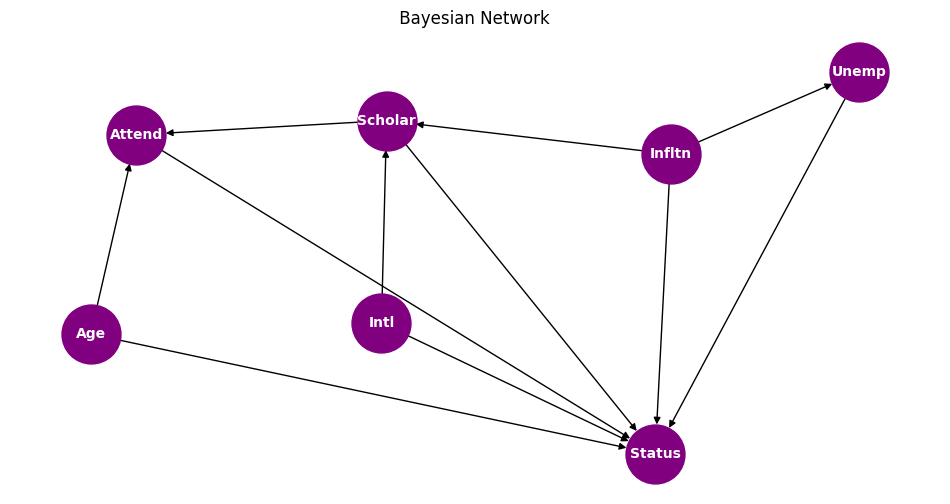

In [88]:
import matplotlib.pyplot as plt
import networkx as nx
# Rename the nodes for neater visualisation
label_map = {
    'Age Group': 'Age',
    'Daytime/evening attendance': 'Attend',
    'Unemployment Level': 'Unemp',
    'Scholarship holder': 'Scholar',
    'Target': 'Status',
    'International': 'Intl',
    'Inflation Level': 'Infltn',
    'Gender': 'Gender'
}
# Visualise the constructed Bayesian Network
G = nx.DiGraph()
G.add_edges_from(model.edges())
G = nx.relabel_nodes(G, label_map)
plt.figure(figsize=(12, 6))
nx.draw_networkx(G,
                 node_color='purple',
                 node_size=1800,
                 font_size=10,
                 font_color='white',
                 font_weight='bold',
                 edge_color='black',
                 arrows=True)
plt.title(' Bayesian Network ')
plt.axis('off')
plt.show()


# **Infering the Fitted Bayesian network**

The Bayesian network can now be infered to answer questions regarding the probability of certain causes of student dropout given observed evidence. This is done using two alternative methods, namely the exact inference using variable elimination or approximate inference using likelihood weighted sampling.

**Variable Elimination (VE)**

Variable Elimination is an exact inference technique for Bayesian networks that computes the posterior P(Q | evidence) by methodically removing all irrelevant variables. It begins by incorporating observed evidence: each conditional probability table (CPT) is restricted to the known values, then the resulting factors are multiplied to form joint distributions over the remaining variables. Next, hidden variables are eliminated one at a time by summing them out of these intermediate factors. Finally, the remaining factor, defined solely over the query variable, is normalized so its probabilities sum to one, yielding the exact posterior distribution for Q given the evidence.


In [69]:
# Define the inference function using variable elimination

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.sampling import BayesianModelSampling
from pgmpy.factors.discrete import State
import networkx as nx
def varElim(Q, evidence):
    infer = VariableElimination(model)

    string = ''
    lst = list(evidence.items())
    last = len(lst) - 1

    for i, pair in enumerate(lst):
        string += pair[0] + '=' + str(pair[1])
        if i != last:
            string += ', '

    prob = infer.query([Q], evidence=evidence, show_progress=False)
    val = prob.values

    print('Probability of {} given {}\n'.format(Q, string))
    print(prob)

**Likelihood Weighted Sampling**

It is an approximate inference method for Bayesian networks that estimates P(Q | evidence) by generating samples consistent with observed evidence. Each sample assigns values to all variables, but evidence variables are fixed, and non-evidence variables are sampled. Every sample receives a weight equal to the product of the probabilities of the evidence variables given their sampled parents. After generating many weighted samples, the posterior distribution of the query variable Q is approximated by the normalized sum of weights for samples where Q takes each possible value. This approach focuses computational effort on regions of the sample space consistent with evidence, improving efficiency over naive sampling.

In [70]:
# Define the inference function using likelihood weighted sampling
def sampLW(Q, evidence, sample_size):
    infer = BayesianModelSampling(model)

    samples = infer.likelihood_weighted_sample(evidence=evidence, size=sample_size, seed=0)

    unique = samples[Q].unique()
    unique.sort()

    string = ''
    last = len(evidence) - 1
    for i, pair in enumerate(evidence):
        string += pair[0] + '=' + str(pair[1])
        if i != last:
            string += ', '

    print('Probability of {} given {}\n'.format(Q, string))

    prob_lst = []
    for val in unique:
        rows = samples[samples[Q] == val]

        numerator = np.sum(rows['_weight'])
        denominator = np.sum(samples['_weight'])
        prob = round(numerator/denominator, 4)

        prob_lst.append(prob)

        print('{}({}) = {}'.format(Q, val, prob))

# **Probabilistic Inference Queries**


**1) How likely is a student to drop out if they are an international student and on a scholarship?**





This query asks for the predictive probability (causal inference) that an undergraduate will drop out given two observed conditions: that they are an international student and that they hold a scholarship.

In [71]:
# Inference using variable elimination
varElim('Target', {
    'International': 1,
    'Scholarship holder': 1
})


Probability of Target given International=1, Scholarship holder=1

+------------------+---------------+
| Target           |   phi(Target) |
+==================+===============+
| Target(Dropout)  |        0.2369 |
+------------------+---------------+
| Target(Enrolled) |        0.1504 |
+------------------+---------------+
| Target(Graduate) |        0.6127 |
+------------------+---------------+


In [72]:
# Inference using likelihood weighted sampling
sampLW('Target', [
    State('International', 1),
    State('Scholarship holder', 1)
], sample_size=10000)


  0%|          | 0/7 [00:00<?, ?it/s]

Probability of Target given International=1, Scholarship holder=1

Target(Dropout) = 0.2328
Target(Enrolled) = 0.1565
Target(Graduate) = 0.6107


This dropout probability is relatively low. This is most likely due to the additional financial support and academic resources that scholarship recipients receive, which help mitigate the challenges international students face.

**2) Does attending evening classes increase dropout probability for older students?**

This query asks for the predictive probability (causal inference) of dropout given that a student is international and holds a scholarship.

In [73]:
# Inference using variable elimination
varElim('Target', {
    'Age Group': 'Older',
    'Daytime/evening attendance': 1
})


Probability of Target given Age Group=Older, Daytime/evening attendance=1

+------------------+---------------+
| Target           |   phi(Target) |
+==================+===============+
| Target(Dropout)  |        0.5604 |
+------------------+---------------+
| Target(Enrolled) |        0.1197 |
+------------------+---------------+
| Target(Graduate) |        0.3199 |
+------------------+---------------+


In [74]:
# Inference using likelihood weighted sampling
sampLW('Target', [
    State('Age Group', 'Older'),
    State('Daytime/evening attendance', 1)
], sample_size=10000)


  0%|          | 0/7 [00:00<?, ?it/s]

Probability of Target given Age Group=Older, Daytime/evening attendance=1

Target(Dropout) = 0.5674
Target(Enrolled) = 0.112
Target(Graduate) = 0.3205


This dropout probability is relatively high. Older students in evening programs often balance work, family, and study commitments with fewer on-campus supports, which can increase their risk of attrition.

**3) If a student dropped out, what’s the chance inflation was Rising?**


This query uses evidential reasoning to estimate the probability that inflation was ‘Rising’ given that a student dropped out.

In [75]:
# Inference using variable elimination
varElim('Inflation Level', {'Target':'Dropout'})


Probability of Inflation Level given Target=Dropout

+----------------------------+------------------------+
| Inflation Level            |   phi(Inflation Level) |
+============================+========================+
| Inflation Level(Deflation) |                 0.2030 |
+----------------------------+------------------------+
| Inflation Level(Rising)    |                 0.5411 |
+----------------------------+------------------------+
| Inflation Level(Stable)    |                 0.2559 |
+----------------------------+------------------------+


In [76]:
# Inference using likelihood weighted sampling
sampLW(
    'Inflation Level',
    [State('Target', 'Dropout')],
    sample_size=10000
)


  0%|          | 0/7 [00:00<?, ?it/s]

Probability of Inflation Level given Target=Dropout

Inflation Level(Deflation) = 0.2034
Inflation Level(Rising) = 0.5353
Inflation Level(Stable) = 0.2613


The outcome shows that if a student drops out, there’s about a 54% chance they were facing rising inflation showing that higher living costs often go hand-in-hand with students leaving their studies.

**4) What is the probability that a student held a scholarship given that they dropout and are an international student?**

This query asks if a student dropped out and is an international student, what’s the chance they held a scholarship. It uses intercausal (explaining-away) reasoning to update our belief about scholarship status given both dropout and international status.

In [77]:
# Inference using variable elimination
varElim('Scholarship holder',
        {'Target':'Dropout','International':1})

Probability of Scholarship holder given Target=Dropout, International=1

+-----------------------+---------------------------+
| Scholarship holder    |   phi(Scholarship holder) |
+=======================+===========================+
| Scholarship holder(0) |                    0.8439 |
+-----------------------+---------------------------+
| Scholarship holder(1) |                    0.1561 |
+-----------------------+---------------------------+


In [78]:
# Inference using likelihood weighted sampling
sampLW(
    'Scholarship holder',
    [
        State('Target', 'Dropout'),
        State('International', 1)
    ],
    sample_size=10000
)

  0%|          | 0/7 [00:00<?, ?it/s]

Probability of Scholarship holder given Target=Dropout, International=1

Scholarship holder(0) = 0.8437
Scholarship holder(1) = 0.1563


The outcome indicates that among international students who dropped out, only about 15–16% had scholarships. This indicates that the vast majority of international dropouts (around 84%) were not scholarship recipients, suggesting that lack of financial support is a strong risk factor for attrition.

# **Conclusion**

The project showed how to build and use a Bayesian network to predict which students might drop out. We combined information on demographics, finances, academic performance and economic conditions into a clear model and ran calculations to see how each factor affects dropout chances. To improve the model, we could add more relevant data, refine how we group the variables and involve experts in shaping the network. These steps would make our predictions more accurate and actionable.